# Ryan Berger - SI 330 Final Project
## An Analysis of Monthly Ranked Twitch Games and Associated Esports Earnings

In [399]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

### Opening CSV Files

#### Twitch Dataset

In [400]:
# https://www.kaggle.com/datasets/rankirsh/evolution-of-top-games-on-twitch
# Top 200 categories every month for 6 years (Jan. 2016 - Dec. 2021)
twitch_games = pd.read_csv('twitch/Twitch_game_data.csv', encoding='cp1252')

In [401]:
twitch_games

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044 hours,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105 hours,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397 hours,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903 hours,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578 hours,71639,3620,214054,21740,1549,14.03
...,...,...,...,...,...,...,...,...,...,...,...,...
14395,196,Garry's Mod,12,2021,630902,21753 hours,24951,99,3537,849,29,29.00
14396,197,Call of Duty: Black Ops Cold War,12,2021,622497,223641 hours,26559,654,25366,837,300,2.78
14397,198,Noita,12,2021,620983,13935 hours,27826,41,1961,835,18,44.56
14398,199,Pro Soccer Online,12,2021,619859,606 hours,36182,20,84,834,0,1022.87


#### Esports Datasets

In [402]:
# https://www.kaggle.com/datasets/rankirsh/esports-earnings
#Esport games over time (Jan. 1998 - Dec. 2021)
historical_esports = pd.read_csv('esports/HistoricalEsportData.csv', encoding='cp1252')

#Overall earnings in Esports per listed game
general_esports = pd.read_csv('esports/GeneralEsportData.csv', encoding='cp1252')

In [403]:
historical_esports

,Date,Game,Earnings,Players,Tournaments
0,1998-01-01,QuakeWorld,15000.00,8,1
1,1998-05-01,Quake II,14600.00,4,1
2,1998-07-01,Quake II,15000.00,5,1
3,1998-07-01,QuakeWorld,6500.00,4,1
4,1998-11-01,Quake II,36600.00,13,2
...,...,...,...,...,...
7336,2021-12-01,Assetto Corsa Competizione,400.00,6,1
7337,2021-12-01,rFactor 2,359.95,17,1
7338,2021-12-01,Age of Mythology,300.00,4,1
7339,2021-12-01,Blaston,200.00,3,1


In [404]:
general_esports

,Game,ReleaseDate,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
0,Age of Empires,1997,Strategy,191181.81,156839.89,261,99
1,Age of Empires II,1999,Strategy,2296502.80,720999.87,1528,1140
2,Age of Empires III,2005,Strategy,93913.65,41800.00,139,120
3,Age of Empires IV,2021,Strategy,151091.75,217.00,248,79
4,Age of Empires Online,2011,Strategy,5356.56,775.00,25,17
...,...,...,...,...,...,...,...
553,Gears of War: Ultimate Edition,2015,Third-Person Shooter,170000.00,170000.00,39,3
554,Knockout City,2021,Third-Person Shooter,0.00,0.00,0,0
555,Mobile Suit Gundam: Extreme Vs Maxi Boost ON,2016,Third-Person Shooter,100.00,0.00,6,1
556,Rogue Company,2020,Third-Person Shooter,50000.00,0.00,48,2


## <u>Data Cleaning and Manipulation</u>

#### Removing null values from the Twitch dataset

In [405]:
twitch_games.isnull().sum()

Rank                0
Game                1
Month               0
Year                0
Hours_watched       0
Hours_Streamed      0
Peak_viewers        0
Peak_channels       0
Streamers           0
Avg_viewers         0
Avg_channels        0
Avg_viewer_ratio    0
dtype: int64

In [406]:
twitch_games.dropna(inplace = True)
twitch_games.isnull().sum()

Rank                0
Game                0
Month               0
Year                0
Hours_watched       0
Hours_Streamed      0
Peak_viewers        0
Peak_channels       0
Streamers           0
Avg_viewers         0
Avg_channels        0
Avg_viewer_ratio    0
dtype: int64

#### Converting the Twitch.tv Datasets to datetime

In [407]:
def change_to_datetime(df):
    year = df['Year']
    month = df['Month']
    day = int('01')
    return datetime.date(year, month, day)
twitch_games['Date'] = twitch_games.apply(change_to_datetime, 1)
twitch_games.Date = pd.to_datetime(twitch_games.Date)

In [408]:
#Making sure that the dataset's 'date' column is in datetime
twitch_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14399 entries, 0 to 14399
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Rank              14399 non-null  int64         
 1   Game              14399 non-null  object        
 2   Month             14399 non-null  int64         
 3   Year              14399 non-null  int64         
 4   Hours_watched     14399 non-null  int64         
 5   Hours_Streamed    14399 non-null  object        
 6   Peak_viewers      14399 non-null  int64         
 7   Peak_channels     14399 non-null  int64         
 8   Streamers         14399 non-null  int64         
 9   Avg_viewers       14399 non-null  int64         
 10  Avg_channels      14399 non-null  int64         
 11  Avg_viewer_ratio  14399 non-null  float64       
 12  Date              14399 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(9), object(2)
memory usage: 1.5+ MB


#### Removing the extraneous columns

In [409]:
twitch_games = twitch_games.drop(columns=['Month','Year'])
twitch_games

,Rank,Game,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,Date
0,1,League of Legends,94377226,1362044 hours,530270,2903,129172,127021,1833,69.29,2016-01-01
1,2,Counter-Strike: Global Offensive,47832863,830105 hours,372654,2197,120849,64378,1117,57.62,2016-01-01
2,3,Dota 2,45185893,433397 hours,315083,1100,44074,60815,583,104.26,2016-01-01
3,4,Hearthstone,39936159,235903 hours,131357,517,36170,53749,317,169.29,2016-01-01
4,5,Call of Duty: Black Ops III,16153057,1151578 hours,71639,3620,214054,21740,1549,14.03,2016-01-01
...,...,...,...,...,...,...,...,...,...,...,...
14395,196,Garry's Mod,630902,21753 hours,24951,99,3537,849,29,29.00,2021-12-01
14396,197,Call of Duty: Black Ops Cold War,622497,223641 hours,26559,654,25366,837,300,2.78,2021-12-01
14397,198,Noita,620983,13935 hours,27826,41,1961,835,18,44.56,2021-12-01
14398,199,Pro Soccer Online,619859,606 hours,36182,20,84,834,0,1022.87,2021-12-01


#### Converting the Historical Esports dataset's 'Date' column to datetime

In [410]:
historical_esports.Date = pd.to_datetime(historical_esports.Date)
historical_esports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7341 entries, 0 to 7340
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         7341 non-null   datetime64[ns]
 1   Game         7341 non-null   object        
 2   Earnings     7341 non-null   float64       
 3   Players      7341 non-null   int64         
 4   Tournaments  7341 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 286.9+ KB


#### Selecting only those rows from January 2016 onwards to match the Twitch dataset


In [411]:
historical_esports = historical_esports.loc[historical_esports['Date'] >= '2016-01-01']
historical_esports

,Date,Game,Earnings,Players,Tournaments
3157,2016-01-01,SMITE,1175000.00,90,2
3158,2016-01-01,Dota 2,684021.02,196,14
3159,2016-01-01,Counter-Strike: Global Offensive,678724.84,625,66
3160,2016-01-01,Hearthstone,302580.64,93,9
3161,2016-01-01,Heroes of the Storm,201829.09,113,13
...,...,...,...,...,...
7336,2021-12-01,Assetto Corsa Competizione,400.00,6,1
7337,2021-12-01,rFactor 2,359.95,17,1
7338,2021-12-01,Age of Mythology,300.00,4,1
7339,2021-12-01,Blaston,200.00,3,1


#### Removing rows where there are values of 0 for total tournaments, which I consider null values for esports

In [412]:
general_esports = general_esports.loc[general_esports['TotalTournaments'] > 0]
general_esports

,Game,ReleaseDate,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
0,Age of Empires,1997,Strategy,191181.81,156839.89,261,99
1,Age of Empires II,1999,Strategy,2296502.80,720999.87,1528,1140
2,Age of Empires III,2005,Strategy,93913.65,41800.00,139,120
3,Age of Empires IV,2021,Strategy,151091.75,217.00,248,79
4,Age of Empires Online,2011,Strategy,5356.56,775.00,25,17
...,...,...,...,...,...,...,...
552,Gears of War 4,2016,Third-Person Shooter,3087285.00,3055000.00,135,41
553,Gears of War: Ultimate Edition,2015,Third-Person Shooter,170000.00,170000.00,39,3
555,Mobile Suit Gundam: Extreme Vs Maxi Boost ON,2016,Third-Person Shooter,100.00,0.00,6,1
556,Rogue Company,2020,Third-Person Shooter,50000.00,0.00,48,2


## <u>Further Data Manipulation and Visualizations</u>

### Twitch categories most commonly ranked in the top 10

In [413]:
twitch_top10 = twitch_games.loc[twitch_games['Rank'] <= 10].groupby(['Game'])['Rank'].count(
                            ).sort_values(ascending=False).head(10)
twitch_top10 =  twitch_top10.to_frame()
twitch_top10.columns = ['top10_count']
twitch_top10

,top10_count
Game,
League of Legends,72
Counter-Strike: Global Offensive,72
Dota 2,63
Fortnite,51
World of Warcraft,50
Grand Theft Auto V,46
Hearthstone,45
Overwatch,39
Just Chatting,39


#### By average rank

In [414]:
avg_twitchrank = twitch_games.groupby(['Game'])['Rank'].mean().sort_values(ascending=True)
avg_twitchrank = avg_twitchrank.to_frame()
avg_twitchrank.columns = ['avg_rank']

#Since E3, an annual event that lasts 3 days, was included for each of 3 years, I added 3 more categories
#to the top 10.
avg_twitchrank.head(13)

,avg_rank
Game,
League of Legends,1.79
Just Chatting,2.77
Fortnite,4.67
Counter-Strike: Global Offensive,5.65
E3 2016,6.00
Dota 2,6.04
VALORANT,6.81
E3 2017,7.00
E3 2018,7.00


#### Creating a merged Twitch and historical esports dataset

In [415]:
#Creating a new dataset with each game, their rank, the date, and peak viewers each month
game_rank = twitch_games[['Game','Rank','Date']]

twitch_merged_historicalesports = game_rank.merge(historical_esports, how='left')

#Removing all values that do not apply to this data (having null values)
twitch_historicalesports = twitch_merged_historicalesports.loc[~twitch_merged_historicalesports['Tournaments'].isnull()]
twitch_historicalesports = twitch_historicalesports.drop(columns = ['Players', 'Tournaments'])
twitch_historicalesports

,Game,Rank,Date,Earnings
0,League of Legends,1,2016-01-01,50025.02
1,Counter-Strike: Global Offensive,2,2016-01-01,678724.84
2,Dota 2,3,2016-01-01,684021.02
3,Hearthstone,4,2016-01-01,302580.64
4,Call of Duty: Black Ops III,5,2016-01-01,7516.92
...,...,...,...,...
14283,Super Smash Bros. Melee,85,2021-12-01,75000.00
14293,F1 2021,95,2021-12-01,750000.00
14297,StarCraft II,99,2021-12-01,83795.60
14321,Tekken 7,123,2021-12-01,21640.00


### Visualization of some of my favorite competitive games' Twitch rank and earnings

             Game  Rank       Date   Earnings
4804  Hearthstone     5 2018-01-01 1109486.78
2001  Hearthstone     2 2016-11-01 1107696.94
7803  Hearthstone     5 2019-04-01 1007307.32
                             Game  Rank       Date  Earnings
13454  Super Smash Bros. Ultimate    56 2021-08-01 195895.99
7623   Super Smash Bros. Ultimate    25 2019-03-01 135928.11
8235   Super Smash Bros. Ultimate    37 2019-06-01 133720.86
            Game  Rank       Date   Earnings
8807   Overwatch     9 2019-09-01 3811048.85
11422  Overwatch    24 2020-10-01 3225000.00
13632  Overwatch    34 2021-09-01 3200000.00


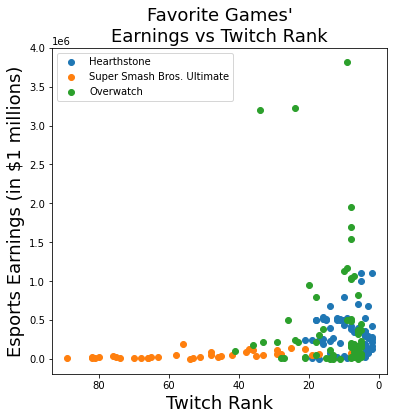

In [416]:
fig, ax = plt.subplots(figsize=(6,6))
favorite_games = ['Hearthstone', 'Super Smash Bros. Ultimate', 'Overwatch']
for game in favorite_games:
    favgames_df = twitch_historicalesports.loc[twitch_historicalesports['Game'] == game]
    fig = plt.scatter(favgames_df['Rank'], favgames_df['Earnings'], label=game)
    #printing some of the highest values for each game
    print(favgames_df.sort_values('Earnings', ascending = False).head(3))

plt.legend()
plt.gca().invert_xaxis()
plt.xlabel('Twitch Rank', fontsize = 18)
plt.ylabel('Esports Earnings (in $1 millions)', fontsize = 18)
plt.title("Favorite Games'\nEarnings vs Twitch Rank", fontsize = 18)
plt.show()

### Monthly Individual Esports Earnigns Per Game

In [417]:
sorted_twitchesports = twitch_historicalesports.sort_values('Earnings', ascending=False)
sorted_twitchesports

,Game,Rank,Date,Earnings
13802,Dota 2,4,2021-10-01,40125696.75
8399,Fortnite,1,2019-07-01,36713555.90
8601,Dota 2,3,2019-08-01,34460762.14
6202,Dota 2,3,2018-08-01,25584943.71
3802,Dota 2,3,2017-08-01,24824809.87
...,...,...,...,...
8768,Yu-Gi-Oh! Duel Links,170,2019-08-01,20.00
2747,Yu-Gi-Oh! Duel Links,148,2017-02-01,12.97
6311,Clash Royale,112,2018-08-01,0.00
9350,Quake Champions,152,2019-11-01,0.00


#### Visualization

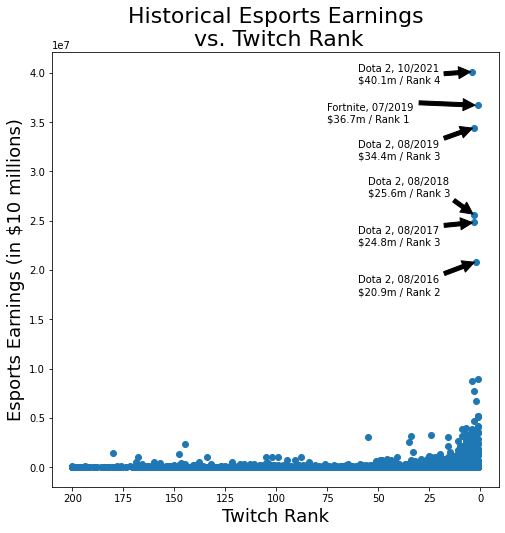

In [418]:
fig, ax = plt.subplots(figsize=(8,8))
fig = plt.scatter(sorted_twitchesports['Rank'], sorted_twitchesports['Earnings'])
plt.gca().invert_xaxis()

plt.annotate('Dota 2, 10/2021\n$40.1m / Rank 4',
             xy=(4, 40125696.75), xytext=(60, 39000000),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Fortnite, 07/2019\n$36.7m / Rank 1',
             xy=(1, 36713555.90), xytext=(75, 35000000),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Dota 2, 08/2019\n$34.4m / Rank 3',
             xy=(3, 34460762.14), xytext=(60, 31250000),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Dota 2, 08/2018\n$25.6m / Rank 3',
             xy=(3, 25584943.71), xytext=(55, 27500000),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Dota 2, 08/2017\n$24.8m / Rank 3',
             xy=(3, 24824809.87), xytext=(60, 22500000),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Dota 2, 08/2016\n$20.9m / Rank 2',
             xy=(2, 20858599.50), xytext=(60, 17500000),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.xlabel('Twitch Rank', fontsize = 18);
plt.ylabel('Esports Earnings (in $10 millions)', fontsize = 18)
plt.title('Historical Esports Earnings\n vs. Twitch Rank', fontsize = 22)
plt.show()

In [419]:
#Finding the outliers
sorted_twitchesports.head(20)

,Game,Rank,Date,Earnings
13802,Dota 2,4,2021-10-01,40125696.75
8399,Fortnite,1,2019-07-01,36713555.90
8601,Dota 2,3,2019-08-01,34460762.14
6202,Dota 2,3,2018-08-01,25584943.71
3802,Dota 2,3,2017-08-01,24824809.87
1401,Dota 2,2,2016-08-01,20858599.50
6600,Fortnite,1,2018-10-01,8898886.68
8802,Fortnite,4,2019-09-01,8773453.96
9401,Fortnite,3,2019-12-01,7763547.89
6801,League of Legends,2,2018-11-01,6680982.54


#### Removing outliers (Under $5 Million)

In [420]:
# $5 million in historical earnings is above the 99th percentile
sub5m_esports = twitch_historicalesports.loc[twitch_historicalesports['Earnings'] <= 5000000]
sub5m_esports.sort_values(by='Earnings', ascending=False)

,Game,Rank,Date,Earnings
2202,Dota 2,3,2016-12-01,4667978.88
6200,Fortnite,1,2018-08-01,4132307.15
7999,Fortnite,1,2019-05-01,4095331.48
13605,Counter-Strike: Global Offensive,7,2021-09-01,3941868.94
14002,Counter-Strike: Global Offensive,4,2021-11-01,3853484.14
...,...,...,...,...
8768,Yu-Gi-Oh! Duel Links,170,2019-08-01,20.00
2747,Yu-Gi-Oh! Duel Links,148,2017-02-01,12.97
6311,Clash Royale,112,2018-08-01,0.00
6410,Call of Duty: Black Ops 4,11,2018-09-01,0.00


#### Visualization

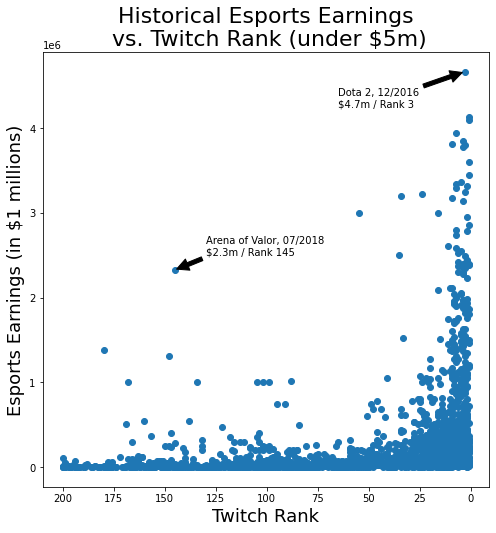

In [421]:
fig, ax = plt.subplots(figsize=(8,8))
fig = plt.scatter(sub5m_esports['Rank'], sub5m_esports['Earnings'])
plt.gca().invert_xaxis()

plt.xlabel('Twitch Rank', fontsize = 18);
plt.ylabel('Esports Earnings (in $1 millions)', fontsize = 18)
plt.title('Historical Esports Earnings\n vs. Twitch Rank (under $5m)', fontsize = 22)

plt.annotate('Dota 2, 12/2016\n$4.7m / Rank 3',
             xy=(3, 4667978.88), xytext=(65, 4250000),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Arena of Valor, 07/2018\n$2.3m / Rank 145',
             xy=(145, 2329160.00), xytext=(130, 2500000),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

In [422]:
#Finding an interesting outlier
twitch_historicalesports.loc[(twitch_historicalesports['Earnings'] > 2000000) & (twitch_historicalesports['Rank'] > 125)]

,Game,Rank,Date,Earnings
6144,Arena of Valor,145,2018-07-01,2329160.00


### Total Esports Earnings Per Game

#### Creating a merged Twitch and general esports dataset

In [423]:
#Merging the average Twitch rank and general esports dataframes
twitch_merged_overallesp = avg_twitchrank.merge(general_esports, how='left',left_on='Game', right_on='Game')

#Getting rid of values that do not have esports data (Chatting streams, IRL, music, etc.)
twitch_overallearnings = twitch_merged_overallesp.loc[~twitch_merged_overallesp['TotalEarnings'].isnull()]


pd.set_option('display.float_format', lambda x: '%.2f' % x)
#Removing those columns I will not use in my analysis
twitch_overallearnings = twitch_overallearnings.drop(columns = ['OnlineEarnings','TotalPlayers', 'TotalTournaments'])
twitch_overallearnings.sort_values(by='TotalEarnings', ascending=False).head(10)

,Game,avg_rank,ReleaseDate,Genre,TotalEarnings
5,Dota 2,6.04,2013.00,Multiplayer Online Battle Arena,279153000.65
3,Counter-Strike: Global Offensive,5.65,2012.00,First-Person Shooter,129352068.91
2,Fortnite,4.67,2017.00,Battle Royale,111339316.05
0,League of Legends,1.79,2009.00,Multiplayer Online Battle Arena,90041272.98
930,Arena of Valor,133.60,2015.00,Multiplayer Online Battle Arena,41290753.03
43,StarCraft II,31.71,2010.00,Strategy,36249504.04
18,Overwatch,13.97,2016.00,First-Person Shooter,32213162.28
10,Hearthstone,8.99,2014.00,Collectible Card Game,26689371.78
99,Heroes of the Storm,50.94,2015.00,Multiplayer Online Battle Arena,18280006.65
35,Rocket League,27.28,2015.00,Sports,16787959.34


#### Visualization

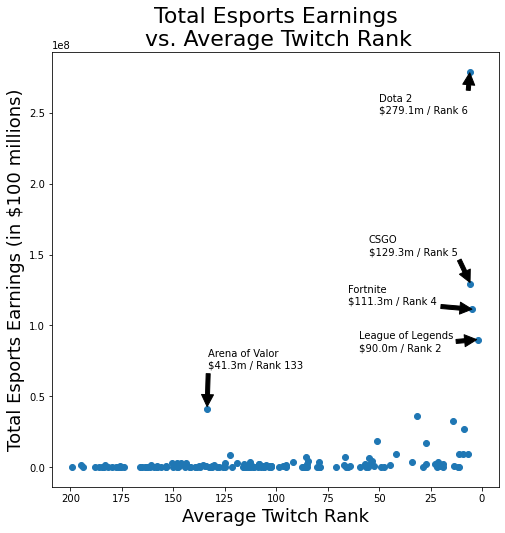

In [424]:
fig, ax = plt.subplots(figsize=(8,8))
fig = plt.scatter(twitch_overallearnings['avg_rank'], twitch_overallearnings['TotalEarnings'])
x = np.arange(201)

plt.gca().invert_xaxis()
plt.xlabel('Average Twitch Rank', fontsize = 18);
plt.ylabel('Total Esports Earnings (in $100 millions)', fontsize = 18)
plt.title('Total Esports Earnings\n vs. Average Twitch Rank', fontsize = 22)

plt.annotate('Dota 2\n$279.1m / Rank 6',
             xy=(5.9, 279153000), xytext=(50, 250000000),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('CSGO\n$129.3m / Rank 5',
             xy=(5.5, 129352068.91), xytext=(55, 150000000),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Fortnite\n$111.3m / Rank 4',
             xy=(4, 111339316.05), xytext=(65, 115000000),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('League of Legends\n$90.0m / Rank 2',
             xy=(2, 90041272.98), xytext=(60, 82250000),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Arena of Valor\n$41.3m / Rank 133',
             xy=(133.600000	, 41290753.03), xytext=(133, 70090753.03),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

####  Those games with $50,000,000 dollars in earnings or less (to account for further outliers)

In [425]:
sub50m_overall = twitch_overallearnings.loc[twitch_overallearnings['TotalEarnings'] <= 50000000]

In [426]:
sub50m_overall.sort_values(by='TotalEarnings', ascending=False).head(10)

,Game,avg_rank,ReleaseDate,Genre,TotalEarnings
930,Arena of Valor,133.60,2015.00,Multiplayer Online Battle Arena,41290753.03
43,StarCraft II,31.71,2010.00,Strategy,36249504.04
18,Overwatch,13.97,2016.00,First-Person Shooter,32213162.28
10,Hearthstone,8.99,2014.00,Collectible Card Game,26689371.78
99,Heroes of the Storm,50.94,2015.00,Multiplayer Online Battle Arena,18280006.65
35,Rocket League,27.28,2015.00,Sports,16787959.34
14,Apex Legends,10.94,2019.00,Battle Royale,9437038.69
65,SMITE,41.82,2014.00,Multiplayer Online Battle Arena,9250112.75
11,Call of Duty: Warzone,9.21,2020.00,First-Person Shooter,8996609.13
6,VALORANT,6.81,2020.00,First-Person Shooter,8859667.50


#### Visualization

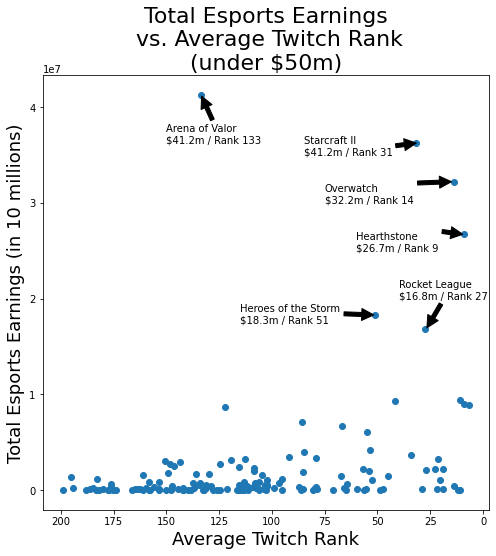

In [427]:
fig, ax = plt.subplots(figsize=(8,8))
fig = plt.scatter(sub50m_overall['avg_rank'], sub50m_overall['TotalEarnings'])

x = np.arange(201)

plt.gca().invert_xaxis()
plt.xlabel('Average Twitch Rank', fontsize = 18);
plt.ylabel('Total Esports Earnings (in 10 millions)', fontsize = 18)
plt.title('Total Esports Earnings\n vs. Average Twitch Rank\n(under $50m)', fontsize = 22)

plt.annotate('Arena of Valor\n$41.2m / Rank 133',
             xy=(133.600000	, 41290753.03), xytext=(150, 36250000.03),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Starcraft II\n$41.2m / Rank 31',
             xy=(31, 36249504.04), xytext=(85, 35000000.03),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Overwatch\n$32.2m / Rank 14',
             xy=(14, 32213162.28), xytext=(75, 30000000.03),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Hearthstone\n$26.7m / Rank 9',
             xy=(9, 26689371.78), xytext=(60, 25000000.03),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Heroes of the Storm\n$18.3m / Rank 51',
             xy=(50.94, 18280006.65), xytext=(115, 17500000.03),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Rocket League\n$16.8m / Rank 27',
             xy=(27, 16787959.34), xytext=(40, 20000000.03),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

### Analysis of total esports earnings by game genre

In [428]:
earnings_bygenre = sub50m_overall.groupby(['Genre'])['TotalEarnings'].describe(
                            ).sort_values(by='mean', ascending=False)
earnings_bygenre

,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
Multiplayer Online Battle Arena,12.00,6313912.57,12278888.48,45950.00,240543.36,910854.59,4501558.11,41290753.03
Collectible Card Game,6.00,5046429.44,10676520.57,4100.00,15936.68,184463.88,2488428.08,26689371.78
Strategy,20.00,3135657.80,8073682.26,220.00,31433.32,288746.84,2598675.72,36249504.04
Battle Royale,4.00,2426759.67,4673612.07,50000.00,87500.00,110000.00,2449259.67,9437038.69
First-Person Shooter,40.00,2414631.50,5455031.78,1390.00,116670.48,337537.24,2460242.12,32213162.28
Sports,21.00,1534987.36,3631992.36,61.30,27243.84,216000.00,1681120.00,16787959.34
Third-Person Shooter,4.00,1272571.25,1444999.11,50000.00,140000.00,976500.00,2109071.25,3087285.00
Fighting Game,25.00,680655.86,946419.22,2004.59,50741.58,123611.42,837447.16,3497427.71
Racing,12.00,481646.63,466101.95,1754.44,136955.64,403164.19,750813.00,1594178.42


#### Visualization

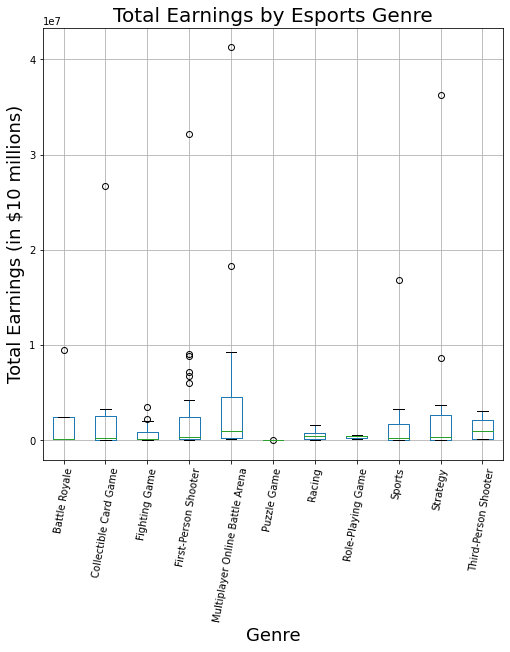

In [429]:
sub50m_overall.boxplot(column='TotalEarnings', by='Genre', figsize=(8,8))

plt.xticks(rotation=80)
plt.xlabel('Genre', fontsize = 18)
plt.ylabel('Total Earnings (in $10 millions)', fontsize = 18)
plt.title('Total Earnings by Esports Genre', fontsize=20)
plt.suptitle('')

plt.show()

#### Visualization of those games with $10,000,000 dollars in earnings or less to account for further outliers

In [430]:
sub10m_overall = sub10m_overall.loc[sub10m_overall['TotalEarnings'] <= 10000000]
sub10m_overall.groupby(['Genre'])['TotalEarnings'].describe(
                            ).sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
Battle Royale,4.00,2426759.67,4673612.07,50000.00,87500.00,110000.00,2449259.67,9437038.69
First-Person Shooter,39.00,1650566.61,2564007.18,1390.00,115980.32,299281.00,1993410.04,8996609.13
Multiplayer Online Battle Arena,10.00,1619619.11,2819602.80,45950.00,123630.09,613480.17,1243072.00,9250112.75
Strategy,19.00,1392823.79,2163636.48,220.00,30955.55,191181.81,2427226.40,8627165.61
Third-Person Shooter,4.00,1272571.25,1444999.11,50000.00,140000.00,976500.00,2109071.25,3087285.00
Sports,20.00,772338.76,1014151.39,61.30,26074.55,170500.00,1532239.47,3242642.34
Collectible Card Game,5.00,717840.97,1400010.18,4100.00,5000.00,48746.72,320181.03,3211177.09
Fighting Game,25.00,680655.86,946419.22,2004.59,50741.58,123611.42,837447.16,3497427.71
Racing,12.00,481646.63,466101.95,1754.44,136955.64,403164.19,750813.00,1594178.42


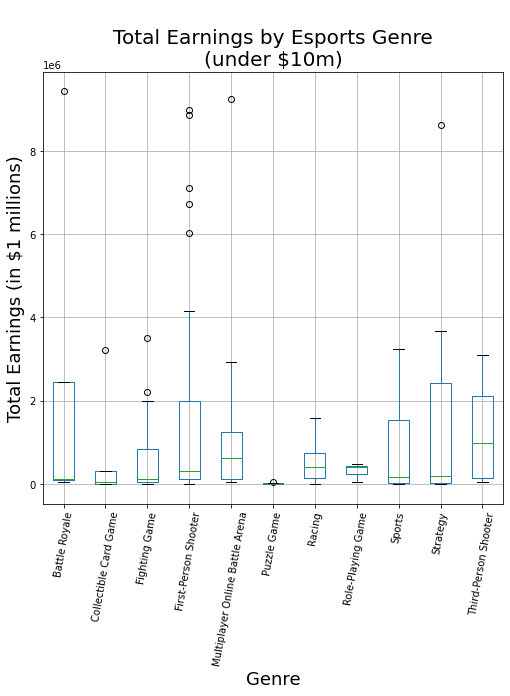

In [431]:
sub10m_overall.boxplot(column='TotalEarnings', by='Genre', figsize=(8,8))

plt.xticks(rotation=80)
plt.xlabel('Genre', fontsize = 18)
plt.ylabel('Total Earnings (in $1 millions)', fontsize = 18)
plt.title('\nTotal Earnings by Esports Genre\n(under $10m)', fontsize=20)
plt.suptitle('')

plt.show()

### Analysis of Twitch rank by esports genre

In [432]:
rank_bygenre = sub50m_overall.groupby(['Genre'])['avg_rank'].describe(
                                    ).sort_values(by='mean',ascending=True)
rank_bygenre

,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
Battle Royale,4.00,86.96,66.25,10.94,47.36,86.45,126.05,164.00
Sports,21.00,87.00,63.52,11.75,27.07,56.50,137.00,186.00
Multiplayer Online Battle Arena,12.00,94.97,49.44,13.76,61.49,98.87,117.96,195.00
Collectible Card Game,6.00,95.90,48.79,8.99,91.12,104.33,110.95,157.91
Strategy,20.00,99.85,51.99,20.23,53.53,101.81,146.51,177.00
Fighting Game,25.00,111.35,40.81,11.00,86.00,113.10,144.50,199.00
First-Person Shooter,40.00,112.74,50.91,6.81,83.37,114.49,151.38,194.00
Role-Playing Game,3.00,116.83,16.38,102.31,107.96,113.61,124.09,134.58
Third-Person Shooter,4.00,128.68,15.33,115.00,118.17,125.26,135.77,149.22


#### Visualization

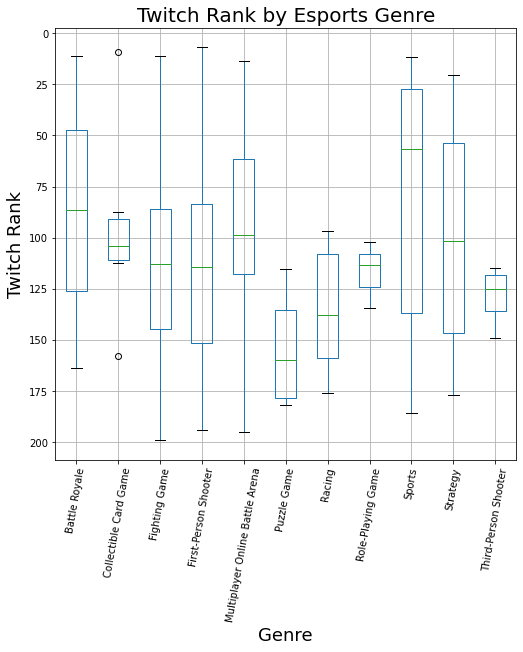

In [433]:
sub50m_overall.boxplot(column='avg_rank', by='Genre', figsize=(8,8))

plt.xticks(rotation=80)
plt.xlabel('Genre', fontsize = 18)
plt.ylabel('Twitch Rank', fontsize = 18)
plt.title('Twitch Rank by Esports Genre', fontsize=20)
plt.suptitle('')
plt.gca().invert_yaxis()

plt.show()